# Linear Regression

# Motivation: Predicting Housing Prizes
---
<img style="float: left;" src="resources/rs.jpg">

- Imagine you are a Real Estate Investor: buy a property, build a house on it, sell the house. 
- Of course you want to increase the gross margin, that is sell it for more than you've invested.
- So the ***main goal*** is to ***calculate a good estimate*** of the ***selling prize***, before you've even build the house!

![rs_data](resources/rs_data.png)
- The selling prize, called label, itself depends on many factors, called ***features***, such as the number of rooms, the average income of people in the neighborhood, the average population in the area etc.
- The goal now is to find out what impact each feature has on the label.
- How do we do that without asking the experts or spending years to gain expertise ourselves?
- The answer of course is: ***Machine Learning!***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
housing_data = pd.read_csv('data/USA_Housing.csv')

In [4]:
housing_data.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [5]:
housing_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### Data Analysis Question: How does the average area number of rooms correlate with house price?

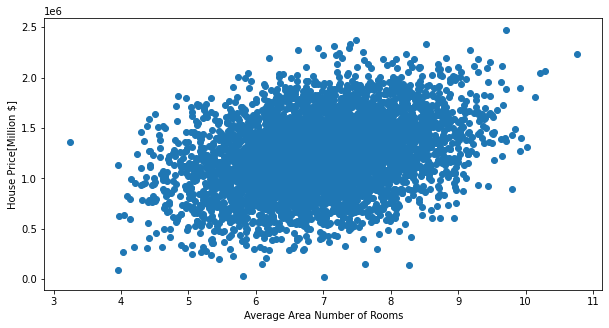

In [6]:
figure = plt.figure(figsize=(10,5)) 
plt.scatter(housing_data['Avg. Area Number of Rooms'], housing_data['Price'])
plt.xlabel('Average Area Number of Rooms')
plt.ylabel('House Price[Million $]');

- We see that there is clearly a pattern in how the average area number of rooms correlates with the housing prize. 

## Our task:
Find the linear relationship(correlation) between a dependent variable $y$, and one independent variables $x$. Here the x-axis represents the independent feature value and the y-axis the dependent variable, or label. So given a data point feature, the linear regression model should output/predict the corresponding y-value.

#### $\Rightarrow$ Find a line that fits the data well

### But before, normalize the features(will see more of it in the feature-engineering lecture)

### 1. Normalize y-axis to values between 0 and 1

$y_{normalized}=\frac{y-y_{min}}{y_{max}-y_{min}}$

### 2. Mapping back to the original values is as easy as

$y_{unnormalized}=(y_{normalized}\cdot(y_{max}-y_{min}))+y_{min}$

### 3. Normalize x-feature to features between 0 and 1

$x_{normalized}=\frac{x-x_{min}}{x_{max}-x_{min}}$

### 4. Mapping back to the original values is as easy as

$x_{unnormalized}=(x_{normalized}\cdot(x_{max}-x_{min}))+x_{min}$

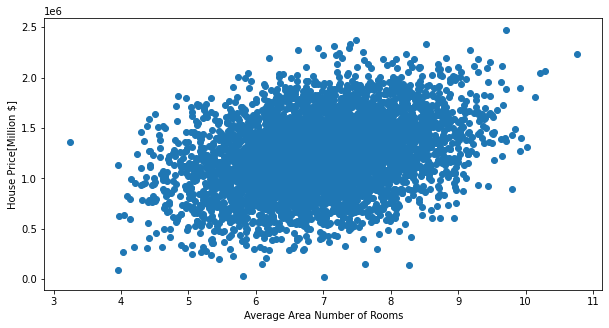

In [7]:
figure = plt.figure(figsize=(10,5)), plt.scatter(housing_data['Avg. Area Number of Rooms'], housing_data['Price'])
plt.xlabel('Average Area Number of Rooms'), plt.ylabel('House Price[Million $]');

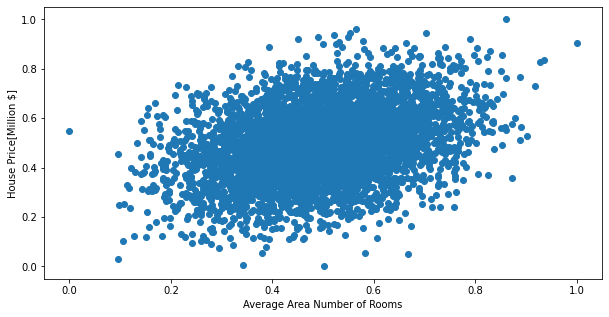

In [10]:
# Normalize y-axis to values between 0 and 1
y = (housing_data['Price'] - housing_data['Price'].min()) \
    / (housing_data['Price'].max() - housing_data['Price'].min()) 
x = (housing_data['Avg. Area Number of Rooms'] - housing_data['Avg. Area Number of Rooms'].min()) \
    / (housing_data['Avg. Area Number of Rooms'].max() - housing_data['Avg. Area Number of Rooms'].min()) 
figure = plt.figure(figsize=(10,5)),\
            plt.scatter(x, y),\
            plt.xlabel('Average Area Number of Rooms'),\
            plt.ylabel('House Price[Million $]');

### Displaying different lines

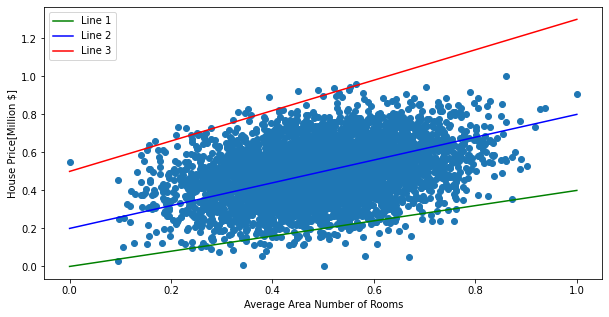

In [11]:
x_line = np.linspace(0,1)

# line parametrizations: y-axis intersection + slope*x
line_1 = 0 + 0.4*x_line; line_2 = 0.2 + 0.6*x_line; line_3 = 0.5 + 0.8*x_line

figure = plt.figure(figsize=(10,5))
plt.scatter(x, y)

plt.plot(x_line, line_1, label="Line 1", color='g'),
plt.plot(x_line, line_2, label="Line 2", color='b'),
plt.plot(x_line, line_3, label="Line 3", color='r')
plt.legend()
plt.xlabel('Average Area Number of Rooms')
plt.ylabel('House Price[Million $]');

### The blue line looks best, but how to find it ??

# Mathematical formulation of the model

## Dataset:

$D=\{( x_{1}, y_{1}), ..., ( x_{N}, y_{N})\}$, so $D\epsilon \mathbb{R}^{N,1+1}$.

where $x\epsilon \mathbb{R}, y_{i}\epsilon \mathbb{R}$.

| feature x | label  |
|---|---|
| xyz  | 1.5  | 
| ...  | ...  | 
| idk  | ...  | 

# Simple linear regression model
---
Linear regression where each datapoint consists of exactly 1 feature.

The ***model***: $\hat{y_{i}} = w_0+w_{1}x_{i}$

$\hat{y_{i}}$: predicted value for data point $x_{i}$

$x_{i}$: independent variable/feature of training data point $i$ - ***given***

$w_0/b$: bias parameter/weight (intercept/offset on y-axis) - ***trainable***

$w_{1}$: parameter/weight value for feature x - ***trainable***

### Note: Bias and weight value stay the same for every data point

### Graphical model of linear regression
- Such a linear regression model can be displayed in a graphical way as follows:
![Perceptron](resources/pt.png)
- $o$ is the prediction of our model which in this case represents the price estimate, or $\hat{y}=o$. The $x_1$-node corresponds to "Avg. Area Number of Rooms"-feature and $w_0,w_1$ are the scalar weights of our model.
- The directed arrows represent a multiplication with the input nodes $1,x_1$.

# Loss/Error function

Given different models, we need a function that measures how "good" certain models are, to make them comparable.
#### $\Rightarrow$ For Linear Regression the Mean-squared error is a popular choice.

### Mean-squared error
---
$MSE_{scalar} = \frac{1}{2N} \sum_{i=1}^{N} (\underbrace{w_0 + w_1 x_i}_{=\hat{y}} - y_i )^{2} = \frac{1}{2N} \sum_{i=1}^{N} ( \mathbf{w}^T \mathbf{x_i} - y_i )^{2} $

$MSE_{matrix} = \frac{1}{2N} \| \mathbf{X}\mathbf{w} - \mathbf{y} \|_2^{2} $

with:

$\mathbf{w} = \begin{bmatrix} w_0 \\ w_1 \end{bmatrix} \epsilon \mathbb{R}^{2,1}$, $\mathbf{x_i} = \begin{bmatrix} 1 \\ x_i \end{bmatrix}\epsilon \mathbb{R}^{2,1},$

$\mathbf{X}=\begin{bmatrix} -\mathbf{x_1}-  \\ ... \\ -\mathbf{x_N}- \end{bmatrix} \epsilon \mathbb{R}^{N,2},$

$\mathbf{y}\epsilon \mathbb{R}^{N,1}$

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
model_1_predictions = 0 + 0.4*x 
model_2_predictions = 0.2 + 0.6*x
model_3_predictions = 0.5 + 0.8*x

In [14]:
# Model prediction mean squared error
print(mean_squared_error(y_true=y, y_pred=model_1_predictions))
print(mean_squared_error(y_true=y, y_pred=model_2_predictions))
print(mean_squared_error(y_true=y, y_pred=model_3_predictions))

0.10619386054641464
0.019411381056935476
0.18437203241379646


$\Rightarrow$ model 2 produces lowest MSE, as expected.

## Plotting the MSE-loss wrt different model parameters $w$
We fix the bias to a good value of 0.2, and see how the error changes with respect to different slope parameters.

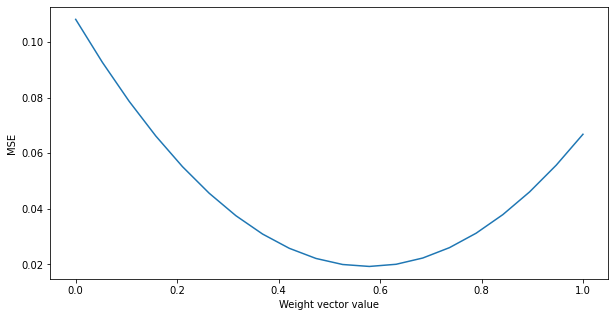

In [16]:
w_s = np.linspace(0, 1, 20)
mse_losses = []
for w in w_s:
    model_prediction = 0.2 + w*   x
    mse_losses.append(mean_squared_error(y, model_prediction))    
fig = plt.figure(figsize=(10,5)),\
        plt.plot(w_s, mse_losses),\
        plt.xlabel('Weight vector value'),\
        plt.ylabel('MSE');

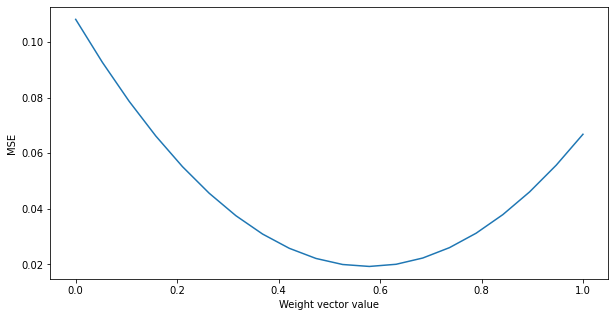

In [17]:
fig = plt.figure(figsize=(10,5)),\
        plt.plot(w_s, mse_losses),\
        plt.xlabel('Weight vector value'),\
        plt.ylabel('MSE');

#### Two things to note:
1. We see that w_1=0.6 seems to be a good choice
2. This seems to be a convex function

### Refresher on convex function
---
<img style="float: left;" src="resources/conv.png">

##### Definition:
---
Let $X$ be a convex set and $f:X\rightarrow \mathbb{R}$ be a function.
Then $f$ is called ***convex*** iff:

$\forall x_1,x_2 \epsilon X, \forall \lambda\epsilon[0,1]: f((1-\lambda) x_1+\lambda x_2)\leq (1-\lambda) f(x_1)+\lambda f(x_2)$

Note: We will see an important property of convex functions in a littel bit.

### Back to our question: How to find our model parameter $w$ such that MSE improves ?

# Optimization

## General problem formulation:


## Mathematical optimization problem formulation:
#### General formulation example:
$\underset{x}{min}\ f(x)$,

$s.t. |x|\leq c$.

Find the optimal value that minimizes a function $f(x)$, and such that the constraing $|x|\leq c$ holds for some given c.
####  Linear Regression optimization without bias/intercept variable:
---
$\underset{w_{1}}{min}\ MSE = \underset{w_{1}}{min} \ \frac{1}{2n} \sum_{n=1}^{N} ( w_{1}x_{i} - y)^{2} = \underset{w_{1}}{min} \ \frac{1}{2N} \| \mathbf{X}w_{1} - \mathbf{y} \|^{2} $, 

with $\mathbf{X}\epsilon\mathbb{R}^{N,1}, \mathbf{y}\epsilon\mathbf{R}^{N,1}$.
#### With bias/intercept variable:
---
Same as without bias term, just include a column of ones to the $X$ matrix, and put $w_0,w_1$ into one vector.

## 1. Approach: Closed-form solution (Rarely possible !)

#### Without bias term:
---
In order to minimize set: $\nabla_{w_{1}} MSE = 0$ and solve for $w_{1}$

$\nabla_{w_1} J(w_1) = \nabla_{w_{1}} MSE = \frac{(\mathbf{X^{T}X}w_{1} - \mathbf{X^{T}y}) \overset{}{}}{N}= 0$

$\Rightarrow w_{1}= (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}$

#### With bias term:
---
Include bias term into weight vector $\mathbf{w}$, add  a column of ones to $X$, set $\nabla_{\mathbf{w}} MSE = 0$ and solve for $\mathbf{w}$.

$\Rightarrow \mathbf{w} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}$

In [18]:
X = np.hstack([np.ones((len(x), 1)), x.to_numpy().reshape(-1,1)])
w_opt = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T, y))

print(f'Optimial weight value: {w_opt}')

Optimial weight value: [0.3155318  0.36140368]


### Evaluating results

In [19]:
print(mean_squared_error(y_true=y, y_pred=np.dot(X, w_opt)))

0.01838216848996925


# 2. Approach: Gradient Descent - Very important optimization algorithm


<img style="float: left;" src="resources/opt.png"/>

#### Algorithm
---
1. Start with random weight value $w^1$

2. Update $w^t$, according to the learning rule: 

&emsp; &emsp; &emsp; $w^{t+1}=w^{t}-\alpha\nabla_{w}J(w_t)$

3. Repeat step 2 until convergence (e.g. n-epochs)

- $\nabla_{w}J(w_t)$: gradient of $J$ with respect to the weight variable $w$, evaluated at point($w^t$). This operator returns the direction of steepest ascent(negative is steepest descent), when standing at point $w^t$.Thus subtracting $\nabla_{w}J(w_t)$ from $w^t$ leads to a $w^{t+1}$ that decreases the loss. 
- $\alpha$: learning rate / step size. How big of a step do we take towards the direction of steepest descent.

<img style="float:left" width="40%" src="resources/opt.png"/>

### Theorem:
---
Consider an optimization problem of the form: 

$min. f(x)$, 

s.t. $x \epsilon \Omega$,

where $f$ is a convex function and $\Omega$ is a convex set. Then, any ***local minimum is also a global minimum***.

### NOTE: Usually loss functions are non-convex!

<img src="resources/global_opt.png"/>

## Impact of learning rate on the optimization performance
The learning rate $\alpha$, also often called "step size", determines how big of your update steps will be in the direction of the current gradient. 

Important facts about the learning rate:
---
1. Smaller learning rates will converge slower to a optimum
2. Larger learning rates might overshoot the optimum and thus never converge towards an optimum
3. The learning rate is a hyperparameter(not learnable, thus needs to be decided by the user)


### -> Jump to Google Viz.:

https://developers.google.com/machine-learning/crash-course/reducing-loss/learning-rate

# Implementing a Simple Linear Regression model in Python


## Workflow-Template:
0. Do the imports
1. Load and explore the data
2. Preprocess the data
3. Choose and implement the model
4. Train the model
5. Evaluate the model

# 0. Do the imports

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# 1. Load and explore the data

In [21]:
data = pd.read_csv('data/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


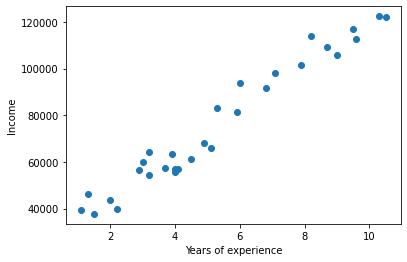

In [22]:
plt.scatter(data.iloc[:,0], data.iloc[:,1]), plt.xlabel('Years of experience'), plt.ylabel('Income');

# 2. Preprocess the data

In [23]:
train_data = data.iloc[:int(data.shape[0]*0.8)]
test_data = data.iloc[int(data.shape[0]*0.8):]

In [24]:
train_data.shape

(24, 2)

In [25]:
test_data.shape 

(6, 2)

In [26]:
x_train = train_data.iloc[:,0].to_numpy().reshape(-1,1)
y_train = train_data.iloc[:,1].to_numpy().reshape(-1,1)

x_test = test_data.iloc[:,0].to_numpy().reshape(-1,1)
y_test = test_data.iloc[:,1].to_numpy().reshape(-1,1)

In [27]:
print(x_train.shape), print(y_train.shape);

(24, 1)
(24, 1)


# 3. Choose and implement the model

In [28]:
model = LinearRegression()

In [29]:
model

LinearRegression()

# 4. Train the model

In [30]:
trained_model = model.fit(x_train, y_train)

In [31]:
print(f'Learned y-axis intercept: {trained_model.intercept_}')
print(f'Learned weight/slope: {trained_model.coef_}')

Learned y-axis intercept: [23659.84867304]
Learned weight/slope: [[10052.78616746]]


# 5. Evaluating the results

### Visual evaluation

In [32]:
train_predictions = trained_model.predict(x_train)
test_predictions = trained_model.predict(x_test)

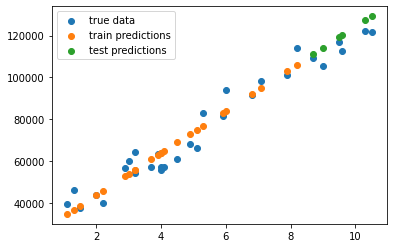

In [33]:
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.scatter(x_train, train_predictions)
plt.scatter(x_test, test_predictions)
plt.legend(['true data', 'train predictions', 'test predictions'])
plt.show()

### Quantitative evaluation using MSE and Residuals
MSE is almost the same for training and test set predictions -> no overfitting

In [34]:
print(mean_squared_error(y_train, train_predictions))

print(mean_squared_error(y_test, test_predictions))

35116249.80808982
35766738.23965806


### Residuals

In [35]:
np.sum(y_train-train_predictions)

6.548361852765083e-11

### Train residuals are almost zero -> good!
They should actually reach zero if our test set size grows

### We will discuss other evaluation techniques soon

## Multiple Linear Regression

![Simple linear regression](resources/mlr.png)
https://www.mathworks.com/help/stats/regress.html

## Dataset:

$D=\{(\mathbf x_{1}, y_{1}), ..., (\mathbf x_{N}, y_{N})\}$, so $D\epsilon \mathbb{R}^{N,d+1}$.

where $\mathbf{x}\epsilon \mathbb{R}^{d,1}, y_{i}\epsilon \mathbb{R}$, with ***d*** independent features.

| feature 1  | ...  | feature d  | label  |
|---|---|---|---|
| xyz  | ...  | ...  | 1.5  |
| ...  | ...  | ...  |  ... |
| idk  | ...  | ...  |  20.5 |

## Multiple linear regression model
---
Linear regression where each datapoint consists multiple features.

The ***model***: $\hat{y_{i}} = w_0+w_1 x^{1}_i+...+w_d x^{d}_i = \mathbf{w^Tx_{i}}$

$\hat{y_{i}}$: predicted value for data point $\mathbf x_{i}$

$\mathbf x_i = \begin{bmatrix} 1 \\ x^{1}_i  \\ ... \\ x^{d}_i \end{bmatrix}$: feature vector of data point $i$, $x^{j}_{i}$: feature $j$ of training data point $i$ - ***given***

$\mathbf w = \begin{bmatrix} w_0  \\ w_1 \\... \\ w_{d} \end{bmatrix}$: weight vector, $w_{j}$: weight/parameter value for feature $x^{j}$ - ***trainable*** 

### Note: We train 1 bias parameter and $j$ weight parameters, one for each feature.

## Mathematical optimization problem formulation:
---
$\underset{\mathbf w}{min}\ MSE = \underset{\mathbf w}{min} \ \frac{1}{2N} \sum_{i=1}^{N} ( \mathbf w^T\mathbf x_{i} - y_i)^{2} = \underset{\mathbf w}{min} \ \frac{1}{2N} \lvert \lvert \mathbf{Xw} - \mathbf{y} \lvert \lvert^{2} $, with $\mathbf{X}\epsilon\mathbb{R}^{N,d+1}, \mathbf{y}\epsilon\mathbf{R}^{N,1},\mathbf{w}\epsilon\mathbb{R}^{d+1,1}$.

$\nabla_{\mathbf w} MSE = \frac{\mathbf{X^{T}(\mathbf X \mathbf w - \mathbf y)} \overset{}{}}{N}= 0$

$\Rightarrow \mathbf w= (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y} $

# Note: Instead of closed-form solution like above, we can use gradient descent instead

# Applying this algorithm will be your task in the practical assignment